In [1]:
from evaluate import evaluate
from unet import UNet

import torch
import torch.nn as nn
import torch.nn.functional as F

import numpy as np
import torch
from PIL import Image

from torchvision import transforms

net = UNet(n_channels=3, n_classes=2, bilinear=False)

In [72]:
net.load_state_dict(torch.load('checkpoints/checkpoint_epoch_224x224_13.pth'))
net.eval()

UNet(
  (inc): DoubleConv(
    (double_conv): Sequential(
      (0): Conv2d(3, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (1): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (2): ReLU(inplace=True)
      (3): Conv2d(64, 64, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
      (4): BatchNorm2d(64, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
      (5): ReLU(inplace=True)
    )
  )
  (down1): Down(
    (maxpool_conv): Sequential(
      (0): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
      (1): DoubleConv(
        (double_conv): Sequential(
          (0): Conv2d(64, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (1): BatchNorm2d(128, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
          (2): ReLU(inplace=True)
          (3): Conv2d(128, 128, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
          (4): BatchNorm2d(128, eps=1e-05, moment

In [73]:
def preprocess(pil_img, scale, is_mask):
        w, h = pil_img.size
        print(w,h)
        newW, newH = int(scale * w), int(scale * h)
        assert newW > 0 and newH > 0, 'Scale is too small, resized images would have no pixel'
        pil_img = pil_img.resize((newW, newH))
        img_ndarray = np.asarray(pil_img)


        if img_ndarray.ndim == 2 and not is_mask:
            img_ndarray = img_ndarray[np.newaxis, ...]
        elif not is_mask:
            img_ndarray = img_ndarray.transpose((2, 0, 1))

        if not is_mask:
            img_ndarray = img_ndarray / 255
            return img_ndarray

In [74]:
filename = '../dfdc_deepfake_challenge/dataset_new_1/testing/crops/crops_testing/orrltuoxgt_1.png'
scale=1.0
img = Image.open(filename).resize((224,224),Image.NEAREST)
img = torch.from_numpy(preprocess(img, scale, is_mask=False))
# img = torch.as_tensor(img.copy()).float().contiguous()?\
img = img.unsqueeze(0)
img = img.to(device='cpu', dtype=torch.float32)

224 224


In [75]:
pred = net(img)
pred.shape

torch.Size([1, 2, 224, 224])

In [76]:
probs = F.softmax(pred, dim=1)[0]

In [77]:
tf = transforms.Compose([
            transforms.ToPILImage(),
            transforms.ToTensor()
        ])
full_mask = tf(probs.cpu()).squeeze()

In [78]:
full_mask

tensor([[[0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         ...,
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961],
         [0.9961, 0.9961, 0.9961,  ..., 0.9961, 0.9961, 0.9961]],

        [[0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         ...,
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000],
         [0.0000, 0.0000, 0.0000,  ..., 0.0000, 0.0000, 0.0000]]])

In [79]:
final = F.one_hot(full_mask.argmax(dim=0), 2).permute(2, 0, 1).numpy()

In [80]:
final.shape

(2, 224, 224)

In [81]:
final[0].shape

(224, 224)

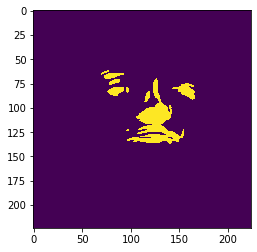

In [82]:
from matplotlib import pyplot as plt
plt.imshow(final[1], interpolation='nearest')
plt.show()

Populating the interactive namespace from numpy and matplotlib


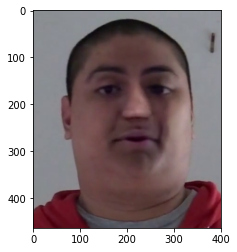

In [71]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../dfdc_deepfake_challenge/dataset_new_1/testing/crops/crops_testing/orrltuoxgt_1.png')
imgplot = plt.imshow(img)
plt.show()

Populating the interactive namespace from numpy and matplotlib


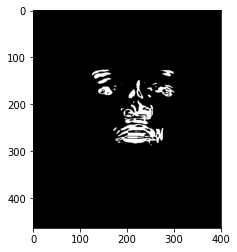

In [15]:
%pylab inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
img = mpimg.imread('../dfdc_deepfake_challenge/dataset_new_1/testing/masks/masks_testing/orrltuoxgt_1.gif')
imgplot = plt.imshow(img)
plt.show()